In [83]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
import random

In [40]:
def history_plot(history):

  plt.subplot(211)
  plt.title("Cross Entropy Loss")
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.subplot(212)
  plt.title("Classification Accuracy")
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [ ]:
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_data, test_data = train_data / 255, test_data / 255
type(train_data)
train_data.shape

(60000, 28, 28)

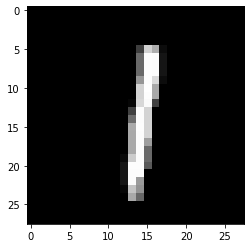

In [ ]:
fit_array = train_data[np.random.randint(0, 60000)]
current_image = np.resize(fit_array.flatten(), (784,1)).reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [71]:
model = tf.keras.Sequential(layers=None, name=None)

In [74]:
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [75]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 3072)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               393344    
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
 flatten_14 (Flatten)        (None, 10)                0         
                                                                 
 dense_33 (Dense)            (None, 128)             

In [10]:
model.compile(optimizer='adam', metrics='accuracy', loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
history = model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2919 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1270 - accuracy: 0.9620
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0910 - accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0727 - accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0577 - accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0494 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0444 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0375 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.02

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9753


[0.08808430284261703, 0.9753000140190125]

Поробуем модель на датасете fashion_mnist

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data, test_data = train_data / 255, test_data / 255

4422102/4422102 [==============================] - 0s 0us/step


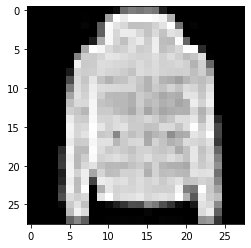

In [ ]:
fit_array = train_data[np.random.randint(0, 60000)]
current_image = np.resize(fit_array.flatten(), (784,1)).reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [ ]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 16.4101 - accuracy: 0.0740


[16.41010284423828, 0.07400000095367432]

In [14]:
fashion_layers = (tf.keras.layers.Conv2D(2, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(32, 32, 3)), 
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=128, activation='relu'), 
          # tf.keras.layers.BatchNormalization(axis=1),
          tf.keras.layers.Dense(units=64, activation='relu'),
          tf.keras.layers.Dropout(0.2), 
          tf.keras.layers.Dense(units=10, activation='softmax'))

In [15]:
f_model = tf.keras.Sequential(layers=layers, name=None)
f_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 2)         152       
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               262272    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 271,330
Trainable params: 271,330
Non-tr

In [17]:
f_model.compile(optimizer='adam', metrics='accuracy', loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [ ]:
history = f_model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5065 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3498 - accuracy: 0.8742
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3006 - accuracy: 0.8899
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2692 - accuracy: 0.9008
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2414 - accuracy: 0.9102
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2182 - accuracy: 0.9187
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1979 - accuracy: 0.9263
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1766 - accuracy: 0.9340
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1580 - accuracy: 0.9402
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [ ]:
f_model.evaluate(test_data, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3465 - accuracy: 0.8959


[0.34653666615486145, 0.8959000110626221]

CIFAR-10

In [26]:
cifar10 = tf.keras.datasets.cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
train_data, test_data = train_data / 255, test_data / 255

In [11]:
c_hist = model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 3ms/step - loss: 1.9419 - accuracy: 0.2887
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7900 - accuracy: 0.3571
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7360 - accuracy: 0.3789
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7010 - accuracy: 0.3914
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6724 - accuracy: 0.4023
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6559 - accuracy: 0.4086
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6407 - accuracy: 0.4157
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6298 - accuracy: 0.4187
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6192 - accuracy: 0.4232
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.61

In [18]:
cc_hist = f_model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.7495 - accuracy: 0.3573
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5086 - accuracy: 0.4518
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3952 - accuracy: 0.4958
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3000 - accuracy: 0.5318
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2088 - accuracy: 0.5665
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1302 - accuracy: 0.5964
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0493 - accuracy: 0.6214
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9819 - accuracy: 0.6463
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9069 - accuracy: 0.6748
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.84

In [76]:
c_layers = (layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32, 32, 3), data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.Conv2D(32, (3,3), activation='relu', padding='same', data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.MaxPool2D((2,2)),
            layers.Dropout(0.2),
            layers.Conv2D(64, (3,3), activation='relu', padding='same', data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.Conv2D(64, (3,3), activation='relu', padding='same', data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.MaxPool2D((2,2)),
            layers.Dropout(0.3),
            layers.Conv2D(128, (3,3), activation='relu', padding='same', data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.Conv2D(128, (3,3), activation='relu', padding='same', data_format='channels_last'),
            layers.BatchNormalization(axis=1),
            layers.MaxPool2D((2,2)),
            layers.Dropout(0.4),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization(axis=1),
            layers.Dense(10, activation='softmax')
)
callbacks_list = (tf.keras.callbacks.ReduceLROnPlateau(patience=5),
                  tf.keras.callbacks.EarlyStopping(patience=10))

In [77]:
c_model = tf.keras.Sequential(layers=c_layers, name=None)
c_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [80]:

c_model.compile(optimizer='adam', metrics='accuracy', loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [82]:
cc_hist = c_model.fit(train_data, train_labels, epochs=30, validation_data=(test_data, test_labels), callbacks=callbacks_list)

Epoch 1/30
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8818 - accuracy: 0.6890 - val_loss: 0.7335 - val_accuracy: 0.7472 - lr: 0.0010
Epoch 2/30
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7487 - accuracy: 0.7391 - val_loss: 0.6436 - val_accuracy: 0.7770 - lr: 0.0010
Epoch 3/30
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6625 - accuracy: 0.7691 - val_loss: 0.6279 - val_accuracy: 0.7842 - lr: 0.0010
Epoch 4/30
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5999 - accuracy: 0.7910 - val_loss: 0.5966 - val_accuracy: 0.7985 - lr: 0.0010
Epoch 5/30
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5501 - accuracy: 0.8080 - val_loss: 0.5939 - val_accuracy: 0.7963 - lr: 0.0010
Epoch 6/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5078 - accuracy: 0.8238 - val_loss: 0.5769 - val_accuracy: 0.8045 - lr: 0.0010
Epoch 7/30
1563/1563 [=========================

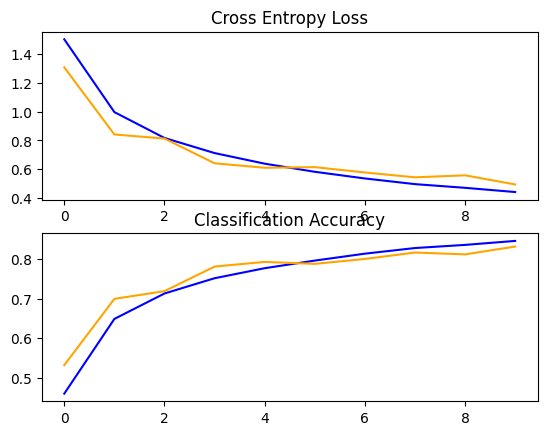

In [70]:
history_plot(cc_hist)

prediction: 0
actual: [0]


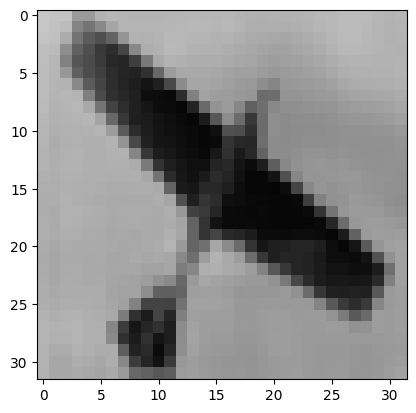

prediction: 7
actual: [7]


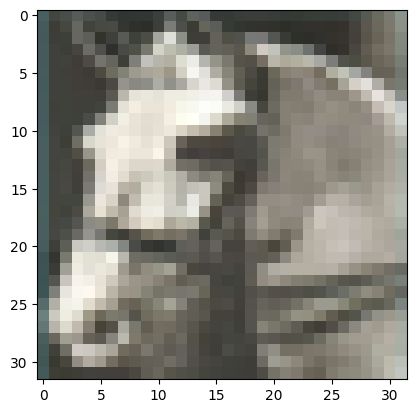

prediction: 2
actual: [2]


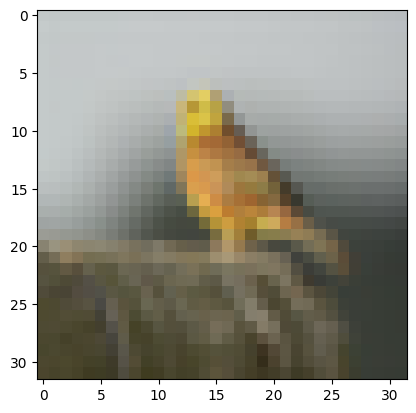

prediction: 5
actual: [5]


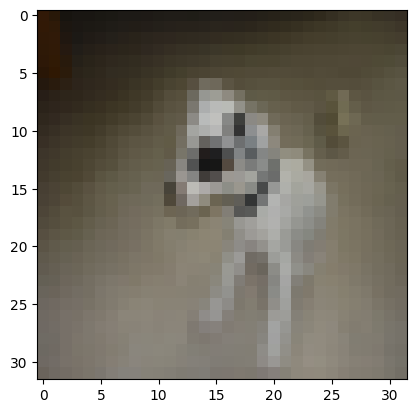

prediction: 9
actual: [9]


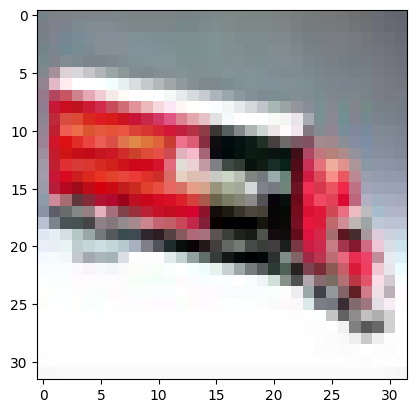

In [93]:
for i in [random.randint(0, len(test_data)) for x in range(5)]:
  arg = np.reshape(test_data[i], (-1, 32, 32, 3))
  result = c_model(arg)
  print('prediction:', np.argmax(result))
  print('actual:', test_labels[i].flatten())
  plt.imshow(test_data[i])
  plt.show()